In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
!pip install ipynbname
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

File output directory: figures/_linear_ols_regression


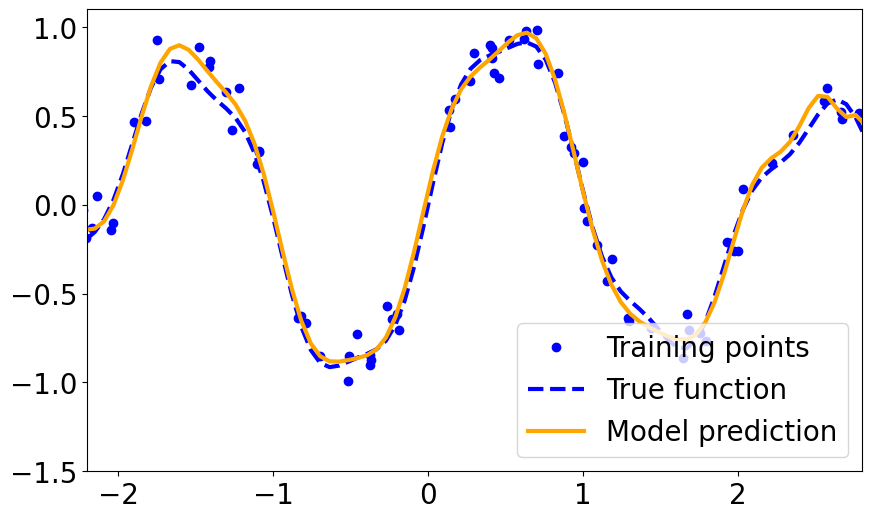

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Create the output directory if it does not exist
print("File output directory:", OUTPUT_DIR)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Define the true function
def true_function(x):
    return np.sin(3 * x) * np.exp(-0.1 * x**2) + 0.1 * np.sin(10 * x)

# Generate random input points
np.random.seed(0)  # Seed for reproducibility
x = np.sort(np.random.uniform(-3, 3, 100))[:, np.newaxis]

# Generate noisy observations
y = true_function(x) + np.random.normal(scale=0.1, size=x.shape)

# Function to create trigonometric polynomial features
def trig_poly_features(x):
    features = [np.ones((x.shape[0], 1))]
    for i in range(1, 16):
        features.append(np.sin(i * x / 2))
        features.append(np.cos(i * x / 2))
    return np.hstack(features)

# Create a transformer for the trigonometric polynomial features
trig_transformer = FunctionTransformer(trig_poly_features, validate=True)

# Create the pipeline
model = Pipeline([
    ('trig_features', trig_transformer),
    ('linear_regression', LinearRegression())
])

# Fit the model
model.fit(x, y)

# Generate model predictions
x_model = np.linspace(-3, 3, 100)[:, np.newaxis]
y_model = model.predict(x_model)

# Generate the true function values for the model x range
y_true = true_function(x_model)

# Define the ranges for x and y axes
x_range = (-2.2, 2.8)
y_range = (-1.5, 1.1)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the training data points
plt.plot(x, y, 'bo', label='Training points')

# Plot the true function
plt.plot(x_model, y_true, 'b--', linewidth=3, label='True function')

# Plot the model prediction
plt.plot(x_model, y_model, 'orange', linewidth=3, label='Model prediction')

# Set the x-axis and y-axis ranges
plt.xlim(x_range)
plt.ylim(y_range)

# Set the font sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legends
plt.legend(fontsize=20)

# Save the figure
plt.savefig(OUTPUT_DIR / 'recreated_image_with_sklearn_transformer_fixed.png', bbox_inches='tight', pad_inches=0)
plt.show()